# The Solow Model with Human Capital

Imports and set magics:

In [2]:
import numpy as np
from scipy import optimize
import sympy as sm
from scipy import linalg
from types import SimpleNamespace
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets 


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

#We import our the classes that we are going to need

from modelprojectREAL import SolowGeneral
from modelprojectREAL import SolowModelClass
from modelprojectREAL import SimulationClass

modelreg = SolowGeneral()
model = SolowModelClass()
simulation = SimulationClass()




# Model description

**The Solow Model (with human capital)**

For our model project we have decided to look into the Solow model.
The Solow model is a macroeconomic model that analyses economic growth and accumulation of capital over time.

We will start by analysing the general Solow model with just population growth and technological progress.

For our extension of the model, we are going to add human capital to our model to see how that changes to dynamics of our model. 

Further we will analyze how changes in the different parameters will change the models projections. 


**The general Solow Model**

The general Solow-model is given as below, by the book "Introducing Advanced Macroeconomics, by H.J.Whitta- Jacobsen and P.B.Sørensen"

**The production functiion :**
$ K_t^\alpha (A_t L_t)^{1-\alpha} $

**Accumulation of physical capital :**
$ K_{t+1} - K_{t} = s_{K} Y_{t} - \delta K_{t} $

**Accumulation of physical capital :**
$ S_t = sY_t $

**Growth in labor :**
$ L_{t+1} = (1 + n) L_{t} $

**Growth in technology :** 
$ A_{t+1} = (1 + g) A_{t} $ 


## Variables 
$Y_t$ is the Production

$K_t$ is the  physical capital

$A_t$ is the technology

$S_t$ is the total amount of savings

$L_t$ is the labor 
## Parameters
$\alpha$ is the income share to physical capital

$\phi$ is the income share to human capital

$\delta$ is the depreciation rate

$n$ is the populaiton growth rate

$g$ is the productivity

$s$ is the savings rate in physical capital

To start analysing our general Solow model, we start by defining our parameters

In [3]:
# We define the parameters used in the model
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

We then solve it for the algebraic steady state via our method:

In [4]:
modelreg.steadystate_analytical()

((delta + g*n + g + n)/s)**(1/(alpha - 1))

The steady state level shows when the accumulation of capital in the economy slows down because the amount that is depreciated is equal to the amount that iis accumulated

We now want to look at numerical solution for our steady state level:

For that we are going to use the following parameter values from the book:


$
\alpha = 1/3$

$\delta = 0.02$

$s = 0.20$

$g = 0.02$

$n = 0.01$


In [5]:
modelreg.steadystate_value()

7.952238885017917

We then see that our steady state level of  technology adjusted capital for the given parameter values is at 7.95

## Transition Diagram

The transition diagram show the evolution of $\tilde{k}_{t+1}$ compared to a 45 degree line where $\tilde{k}_{t}$ =  $\tilde{k}_{t}$. Where they intercept would be the steady state level of capital in the economy.

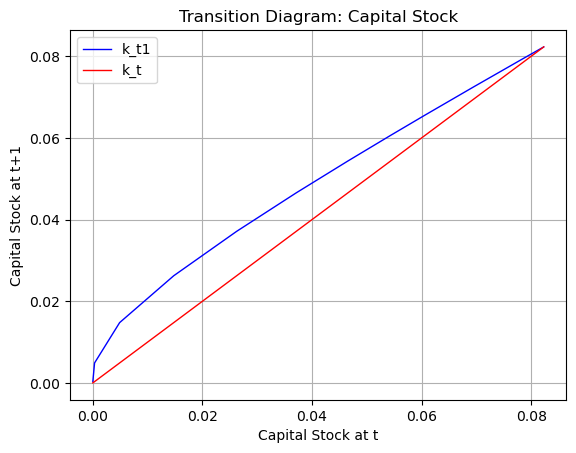

In [24]:
modelreg.plot_transition_diagram()

## Simulation of general model

In [3]:
modelreg.simulation()

interactive(children=(FloatSlider(value=0.3333333333333333, description='Alpha:', max=0.5, step=0.01), FloatSl…

## Adding Human capital to our model

For our extension of the model, we are now going to add a new form of capital to our model. This is called Human Capital. Human capital is generally defined as accumulation of education, health, learning and other things that makes us more productive.

## The model with human capital

The full models is defined with the following equations

**The production function :**
$ Y_{t} = K_{t}^{\alpha} H_{t}^{\phi} (A_{t} L_{t})^{1-\alpha -\phi} $

**Accumulation of physical capital :**
$ K_{t+1} - K_{t} = s_{K} Y_{t} - \delta K_{t} $

**Accumulation of human capital :**
$ H_{t+1} - H_{t} = s_{H} Y_{t} - \delta H_{t} $

**Growth in labor :**
$ L_{t+1} = (1 + n) L_{t} $

**Growth in technology :** 
$ A_{t+1} = (1 + g) A_{t} $ 


**Most of the parameters and variables remain the same, however we are going to introduce some new ones:**

$H_t$ is the human capital

$\phi$ is the income share to human capital

$s_H$ is the savings rate in human capital

$s_K$ is the savings rate in physical capital

We can compute the variables as per effective worker variables: 
$$
\tilde{y_{t}}= \tilde{k_{t}}^{\alpha} \tilde{h_{t}}^{\phi} 
$$
$$
\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{K} \tilde{y_{t}} + (1-\delta) \tilde{k_{t}} \right)
$$
$$ 
\tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)} \left( s_{H} \tilde{y_{t}} + (1-\delta) \tilde{h_{t}} \right)
$$

The transition-equations can be found by substituting for y in the two latter equations

## Steady State

#### We will start by solving the steady states analytically

First we calculate the steady state values for $ h^* $ and $ k^*$

In [8]:
# We name our variables 
k = sm.symbols('k')
h = sm.symbols('h')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
g = sm.symbols('g')
n = sm.symbols('n')
phi = sm.symbols('phi')

In [9]:
# We call on the module from the SolowModelClass, to solve the steady state
model.SteadyStateValues_k(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi))**(1/(alpha - 1))

In [10]:
model.SteadyStateValues_h(k,h,alpha,delta,s_K,s_H,g,n,phi)

((delta + g*n + g + n)/(s_H*(((delta + g*n + g + n)/(h**phi*s_K))**(1/(alpha - 1)))**alpha))**(1/(phi - 1))

We can write these two expressions a bit nicer

$$
\tilde{k}^* = \left( \frac { s_K ^{1-\phi}  s_H^\phi} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$
$$
\tilde{h}^* = \left( \frac { s_K ^\alpha  s_H^{1-\alpha}} { n+ g + \delta + ng } \right) ^\frac{1}{1-\phi - \alpha}
$$

We now have the the two Steady State equations for $h^*$ and $k^*$. 

Now we will calculate the steady state values for $k^*$ and $h^*$

In [11]:
# We define the two steady states:
k_tilde = ((s_K**(1-phi) * s_H**phi)/(n+g+delta +n*g))**(1/(1-phi-alpha))
h_tilde = ( (s_K**(alpha) * s_H**(1-alpha))/(n+g+delta +n*g))**(1/(1-phi-alpha))
        
# Now we turn them in to pyhton function, using sympy lambdify.
kss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),k_tilde)
hss_function = sm.lambdify((alpha,phi,delta,n,g,s_K,s_H),h_tilde) 

print(f'The steady state value for k is {kss_function(0.333,0.333,0.02,0.014,0.016,0.25,0.129):4f}, and the steady state value for h is {hss_function(0.333,0.333,0.02,0.014,0.016,0.25,0.129):4f}')

The steady state value for k is 63.157123, and the steady state value for h is 32.589075


We can now also derive the Nullclines which show respectively when $\Delta \tilde{h}=0$ and when $\Delta \tilde{k} =0$

The equations for the Nullclines are found in the book and they look as follows:
$$ \Delta \tilde{k} =0 \iff \tilde{h}=\left(\frac{{(n + g + \delta + n \cdot g)}}{{s_K}}\right)^{\frac{1}{{\phi}}} \cdot k_{\tilde{t}}^{\frac{{1 - \alpha}}{{\phi}}}
$$
$$
\Delta \tilde{h}=0 \iff \tilde{h}=\left(\frac{{s_H}}{{n + g + \delta + n \cdot g}}\right)^{\frac{1}{{1 - \phi}}} \cdot k_{\tilde{t}}^{\frac{{\alpha}}{{1 - \alpha}}}
$$

We have added a method that simulates these nullclines given our parameter values over a period of time to show the interception is the steady state level for the model as represented by the red not on the graphs.

The graphs have been made interactive, so we can see how the different parameters affect the nullclines and the steady state level


In [12]:
model.Nullclines()

interactive(children=(FloatSlider(value=0.25, description='s_K', max=1.0, min=0.01, step=0.01), FloatSlider(va…

## Simulating the Solow model with Human capital

Lastly we have made a simulation, also with an interactive plot which shows the devolopment of our per effective worker variables:

This plot is also interactive, making it possible to see how a change in the saving rates for physical and human capital affect our simulation.

In [13]:
simulation.simulate(periods=500)

interactive(children=(FloatSlider(value=0.25, description='s_K', max=0.5, min=0.01, step=0.01), FloatSlider(va…

<function modelprojectREAL.SimulationClass._create_s_H_plot.<locals>.update_simulation(s_K, s_H)>

As both are factors in the production function both will lead to an increase in Y, meaning that when you then take the saving rate of the other production factor the total amount of savings will automatically increase. We are however seeing decreasing marginal product for both, meaning that the distance between the two factors the less the more of a difference will we see in the cross effects.

## Conclusion

We have now gone over some of the main tools to analyze both the general Solow model and the model with Human capital. We found that with the parameter values from the book, which have been found through empirical analysis, that there will be a convergence towards a steady state level of capital in the economy in both models.

It is however important to realize that this convergence is only for the tilde adjusted per capita values. With technological progress in the economy, the total level of capital and output will converge to a steady growth path.

Lastly we tested what different oarameters and savings rates would mean for the convergence. We saw that higher saving rates lead to higher levels of steady state and the other way around

It is however important to realize that, it is not an easy thing to change the savings rate in an economy. The population obviously need to consume a certain level to maintain a certain standard of living.

As it is with these types of models, there are a lot of things can we couldve analyzed deeper, for example it would be interesting to calcute the golden rule savings rate for different parameter values and compare that way. We chose to use the parameter values for USA from the book, but international comparison wouldve been interesting. Other than that it could also have been interesting to look at the convergence speed and calculated that, it wouldve given us a more definitive answer to many of our questions.

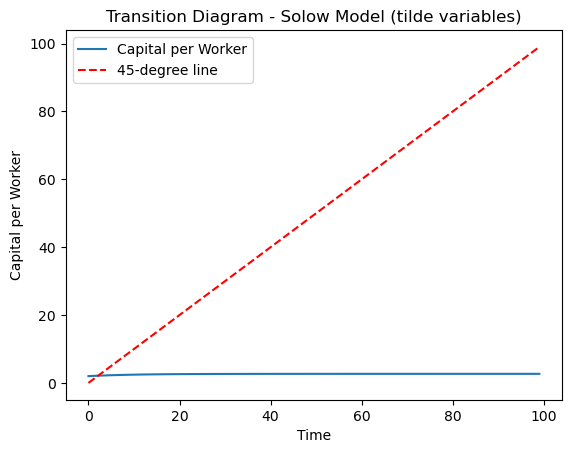

In [38]:
s = 0.3        # Savings rate
n = 0.02       # Population growth rate
g = 0.03       # Technological progress rate
alpha = 0.3    # Capital share of income
delta = 0.1    # Depreciation rate
k0 = 2.0       # Initial capital stock per worker
t = np.arange(0, 100)  # Time period

def solow_model(k_tilde, s, n, g, alpha, delta):
    return (1 / ((1 + n) * (1 + g))) * (s * (k_tilde**alpha) + (1 - delta) * k_tilde)

k_tilde = np.zeros_like(t, dtype=float)
k_tilde[0] = k0

for i in range(1, len(t)):
    k_tilde[i] = solow_model(k_tilde[i-1], s, n, g, alpha, delta)

plt.plot(t, k_tilde, label='Capital per Worker')
plt.plot(t, t, 'r--', label='45-degree line')  # Plotting the 45-degree line
plt.xlabel('Time')
plt.ylabel('Capital per Worker')
plt.title('Transition Diagram - Solow Model (tilde variables)')
plt.legend()
plt.show()

